In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import os
import warnings
import joblib
warnings.filterwarnings('ignore')

In [50]:
path = os.getcwd()

In [51]:
#importing the dataset
dataset = pd.read_csv(f"{path}/phishcoop.csv")
dataset

id  having_IP_Address  URL_Length  Shortining_Service  \
0        1                 -1           1                   1   
1        2                  1           1                   1   
2        3                  1           0                   1   
3        4                  1           0                   1   
4        5                  1           0                  -1   
...    ...                ...         ...                 ...   
6987  6988                  1          -1                   1   
6988  6989                 -1          -1                   1   
6989  6990                 -1          -1                   1   
6990  6991                 -1          -1                   1   
6991  6992                  1          -1                   1   

      having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                    1                        -1             -1   
1                    1                         1             -1   
2                    1                         1             -1   
3                    1                         1             -1   
4                    1                         1             -1   
...                ...                       ...            ...   
6987                 1                         1             -1   
6988                 1                         1             -1   
6989                 1                         1             -1   
6990                -1                        -1              1   
6991                 1                         1             -1   

      having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                    -1              -1                           -1  ...   
1                     0               1                           -1  ...   
2                    -1              -1                           -1  ...   
3                    -1              -1                            1  ...   
4                     1               1                           -1  ...   
...                 ...             ...                          ...  ...   
6987                  1               1                           -1  ...   
6988                  0              -1                            1  ...   
6989                  0               1                            1  ...   
6990                 -1               1                            1  ...   
6991                  1               1                           -1  ...   

      popUpWidnow  Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  \
0               1       1             -1         -1           -1         -1   
1               1       1             -1         -1            0         -1   
2               1       1              1         -1            1         -1   
3               1       1             -1         -1            1         -1   
4              -1       1             -1         -1            0         -1   
...           ...     ...            ...        ...          ...        ...   
6987            1       1             -1          1            1          1   
6988            1       1             -1          1            1          1   
6989            1       1             -1          1            1          1   
6990           -1       1             -1          1            1         -1   
6991            1       1             -1          1            1          1   

      Google_Index  Links_pointing_to_page  Statistical_report  Result  
0                1                       1                  -1      -1  
1                1                       1                   1      -1  
2                1                       0                  -1      -1  
3                1                      -1                   1      -1  
4                1                       1                   1       1  
...            ...                     ...                 ...     ...  
6987             1                   

In [52]:
dataset = dataset.drop('id', axis=1) #removing unwanted column

x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

In [53]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

In [54]:
#----------------applying grid search to find best performing parameters 
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

In [55]:
grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 
#-------------------------------------------------------------------------

Best Accurancy =0.9708229939091393
best parameters ={'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 700}


In [56]:
#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', random_state=0)

In [57]:
#predicting the tests set result
y_pred = classifier.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9765446224256293

In [59]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[808  20]
 [ 21 899]]


In [60]:
import matplotlib.pyplot as plt
from sklearn import metrics

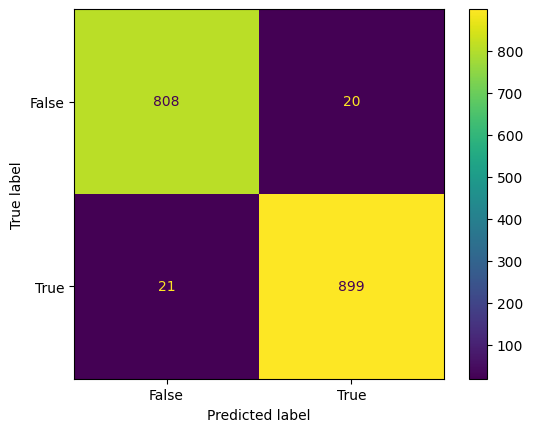

In [61]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [62]:
#pickle file joblib
joblib.dump(classifier, 'rf_final.pkl')

['rf_final.pkl']

In [63]:
#-------------Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

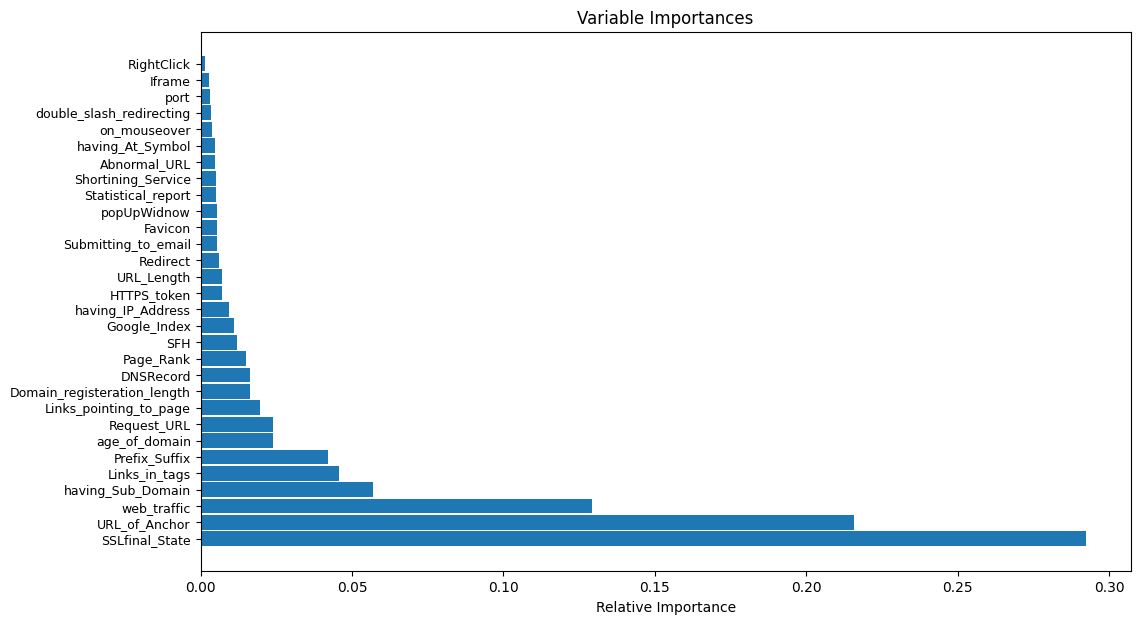

In [64]:
#-------------plotting variable importance
plt.figure(figsize= (12,7))
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.9)
plt.yticks(np.arange(len(names)), names[indices], fontsize=9)
plt.xlabel('Relative Importance')
plt.show()